In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200, 'display.max_columns', 50)



In [2]:
results = pd.read_csv('IntrinsicProfiles_Results.csv')
results['MouseDevelopment'] = results['MouseDevelopment'].astype('category')
results['MouseDevelopment'] = results['MouseDevelopment'].cat.reorder_categories(['P5-P8', 'P9-P13', 'P14-P18'])
results['Tau'] = results['Tau']*1000
results['AP_HalfWidth'] = results['AP_HalfWidth']*1000

In [3]:
def setPlotLayout(ax):
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=3, length=10)
    ax.yaxis.set_tick_params(width=3, length=10)
    return ax

In [4]:
def plotIPfeatures_Window(df, hue = None):
    columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP"]
    ylabels = ['Rin (M\u03A9)', 'RMP (mV)', 'Tau (ms)', 'Rheobase (pA)', 'Max Firing Frequency (Hz)', 'Adaptation Index', 'Voltage Sag (mV)', 'AP Threshold (mV)', 'AP Half Width (ms)', 'AP Height (mV)', 'AP AHP (mV)']
    ylowerlim = [0, None, 0, 0, 0, None, 0, None, None, None, None]

    fig, axes = plt.subplots(4,3, figsize=[20, 20])
    axes = axes.flatten()
    for i, y in enumerate(columns):
        ax = axes[i]
        sns.violinplot(x="MouseDevelopment", y=y, kind="violin", hue=hue, inner="quartile", data=df, color="lightgray", ax=ax)
        if hue is None:
            sns.swarmplot(x="MouseDevelopment", y=y, data=df, hue=hue, color="black", ax=ax)
        ax = setPlotLayout(ax)
        ax.set_ylim(bottom=ylowerlim[i])
        ax.set_ylabel(ylabels[i], fontsize=20)
        if i not in (8, 9, 10):
            ax.xaxis.set_ticklabels([])


In [13]:
def plotIPfeatures_Age(df, hue = None):
    columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP"]
    ylabels = ['Rin (M\u03A9)', 'RMP (mV)', 'Tau (ms)', 'Rheobase (pA)', 'Max Firing Frequency (Hz)', 'Adaptation Index', 'Voltage Sag (mV)', 'AP Threshold (mV)', 'AP Half Width (ms)', 'AP Height (mV)', 'AP AHP (mV)']
    ylowerlim = [0, None, 0, 0, 0, None, 0, None, None, None, None]

    fig, axes = plt.subplots(4,3, figsize=[20, 20])
    axes = axes.flatten()
    for i, y in enumerate(columns):
        ax = axes[i]
        sns.scatterplot(x="MouseAge", y=y, data=df, color="black", ax=ax)
        ax = setPlotLayout(ax)
        ax.set_ylim(bottom=ylowerlim[i])
        ax.set_ylabel(ylabels[i], fontsize=20)
        if i not in (8, 9, 10):
            ax.xaxis.set_ticklabels([])


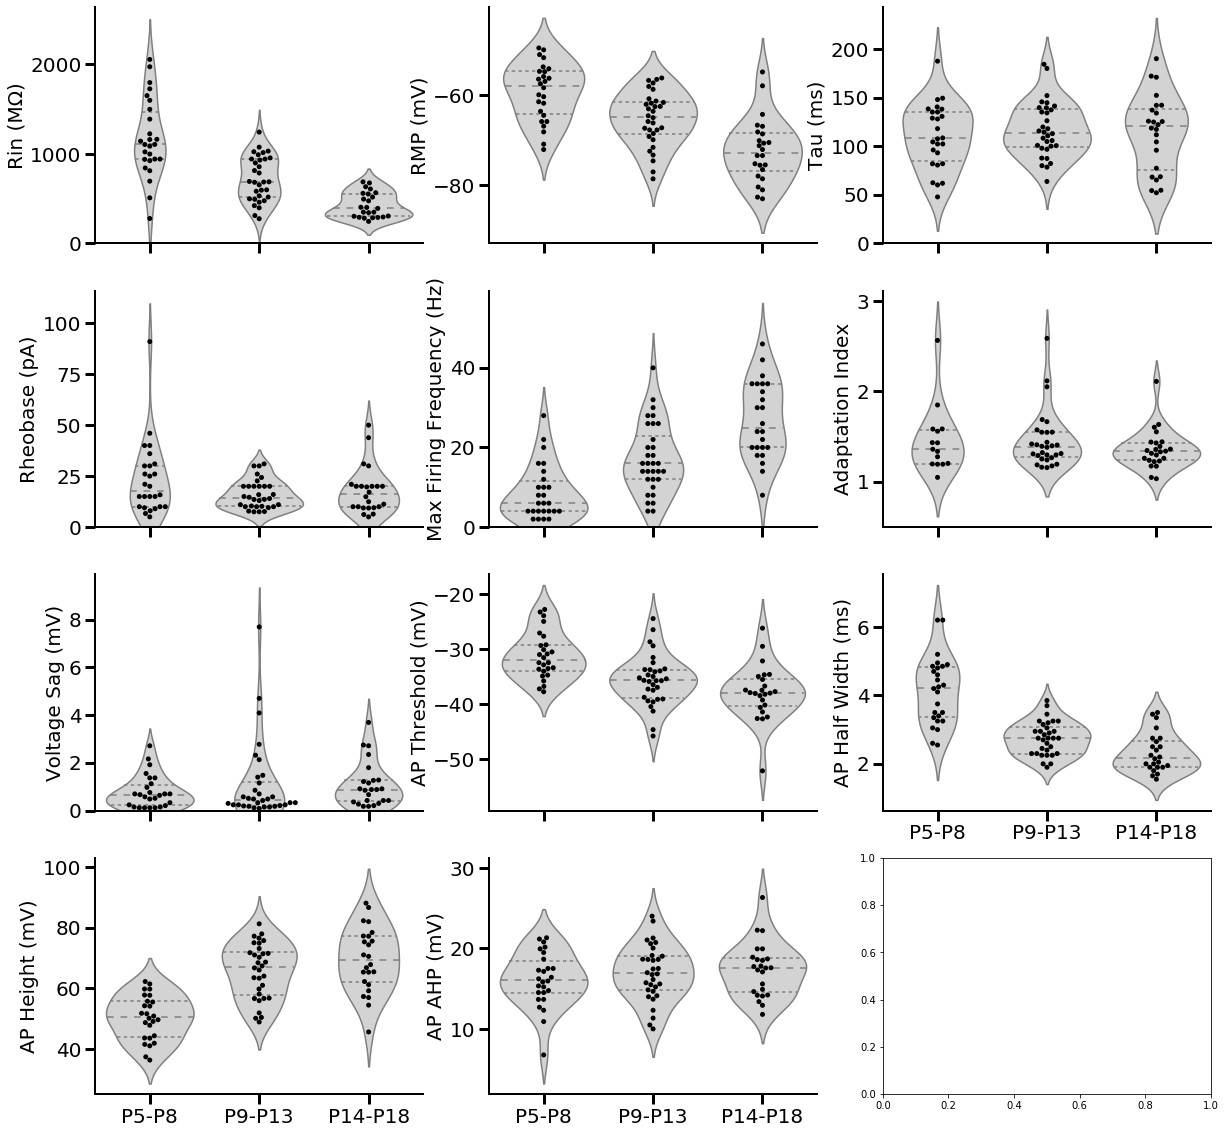

In [18]:
## L4 Pyramidal cells in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==4)]
# df[df.AdaptationIndex>2]
plotIPfeatures_Window(df)
# plt.savefig('Figures//IP_V1_Pyr_L4.pdf')  

In [15]:
## Pyramidal cells across layers in V1
# df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==23)]
# plotIPfeatures(df)
# plt.savefig('Figures//IP_V1_Pyr_L23.pdf')  

df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==5)]
# plotIPfeatures(df)
# plt.savefig('Figures//IP_V1_Pyr_L5.pdf') 

# df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==6)]
# plotIPfeatures_Window(df)
# plt.savefig('Figures//IP_V1_Pyr_L6.pdf') 

In [19]:
columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP"]
df.groupby('MouseDevelopment')[columns].mean()


,Rin,RMP,Tau,Rheobase,MaxFiringFrequency,AdaptationIndex,VoltageSag,AP_Threshold,AP_HalfWidth,AP_Height,AP_AHP
MouseDevelopment,,,,,,,,,,,
P5-P8,1176.849096,-59.344896,110.421542,23.307218,8.769231,1.454815,0.791110,-31.205397,4.144231,50.277710,16.155536
P9-P13,721.575793,-65.305444,117.160684,16.006821,17.187500,1.454902,1.116753,-35.648346,2.748437,65.672874,16.975403
P14-P18,430.096382,-72.284566,113.727676,17.789697,26.916667,1.358218,1.090368,-37.832896,2.329167,69.419861,17.355601


In [20]:
df


,Unnamed: 0,MouseID,MouseAge,MouseDevelopment,BrainArea,CellID,CellTarget,CellType,CellLayer,Rin,RMP,Tau,Rheobase,MaxFiringFrequency,AdaptationIndex,VoltageSag,AP_Threshold,AP_Height,AP_HalfWidth,AP_AHP
0,0,MJ0,12,P9-P13,V1,MJ0.1,Pyramidal,Pyr,4.0,654.740767,-61.816406,78.525695,7.500000,22.0,1.308798,2.136230,-37.231445,70.983887,2.95,19.134521
2,2,MJ11,7,P5-P8,V1,MJ11.2,Pyramidal,Pyr,4.0,1161.110618,-64.501953,118.153923,8.000000,20.0,1.583815,0.122070,-30.487061,48.675537,4.85,21.179199
6,6,MJ17,8,P5-P8,V1,MJ17.3,Pyramidal,Pyr,4.0,942.993164,-65.866089,135.262774,26.009434,16.0,1.194497,0.701904,-32.440186,59.753418,3.25,17.517090
7,7,MJ19,9,P9-P13,V1,MJ19.1,Pyramidal,Pyr,4.0,1024.813970,-56.541795,114.478308,15.897436,10.0,2.587658,0.152588,-31.494141,50.384521,3.45,12.329102
10,10,MJ25,14,P14-P18,V1,MJ25.1,Pyramidal,Pyr,4.0,676.196783,-54.896304,77.394889,10.000000,20.0,1.357901,0.885010,-39.215088,75.317383,3.50,18.615723
11,11,MJ26,15,P14-P18,V1,MJ26.1,Pyramidal,Pyr,4.0,566.879084,-76.501289,124.959342,20.000000,20.0,1.346418,0.366211,-37.963867,77.178955,2.00,14.923096
12,12,MJ30,11,P9-P13,V1,MJ30.1,Pyramidal,Pyr,4.0,1244.136695,-63.056695,144.798578,13.036364,16.0,1.418561,0.122070,-33.935547,77.178955,2.45,18.676758
13,13,MJ30,11,P9-P13,V1,MJ30.2,Pyramidal,Pyr,4.0,899.963379,-67.727661,145.709856,7.834697,14.0,1.406844,0.335693,-24.444580,67.382812,2.70,21.057129
14,14,MJ30,11,P9-P13,V1,MJ30.3,Pyramidal,Pyr,4.0,787.310466,-61.330646,104.899189,20.000000,16.0,1.323579,0.854492,-33.691406,64.025879,2.90,15.228271
15,15,MJ31,10,P9-P13,V1,MJ31.1,Pyramidal,Pyr,4.0,599.060059,-63.595581,80.063576,24.333333,6.0,1.574336,0.091553,-35.644531,66.009521,2.75,10.498047


C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


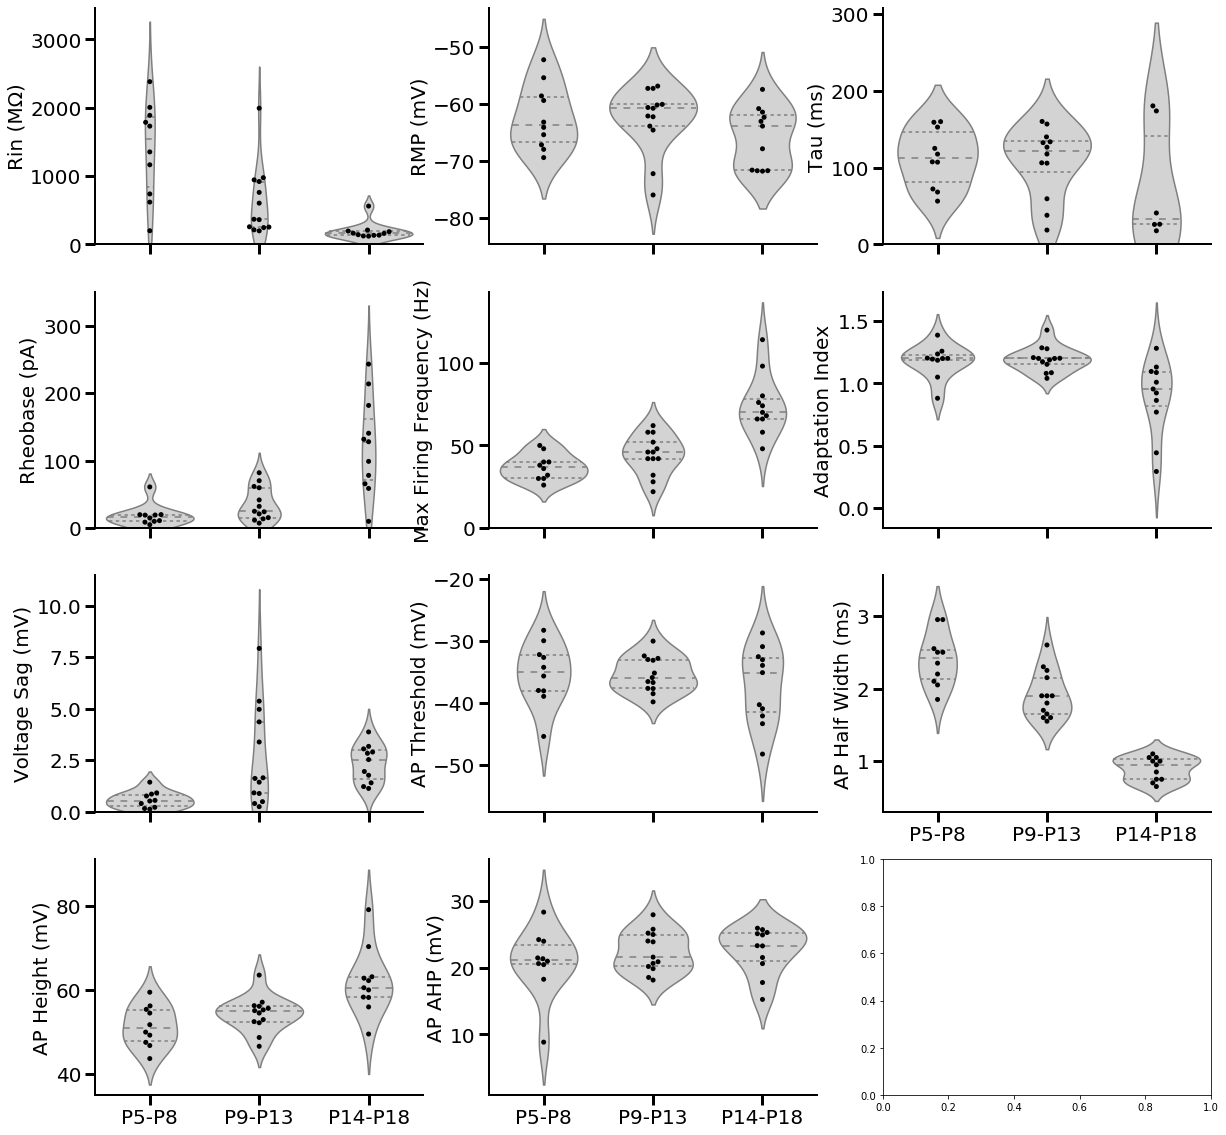

In [29]:
## L4 PV cells in V1
df = results[(results.BrainArea=="V1") & ((results.CellType=="FS") | (results.CellType=="PV")) & (results.CellLayer==4)]
plotIPfeatures(df)
plt.savefig('Figures//IP_V1_FS_L4.pdf')  

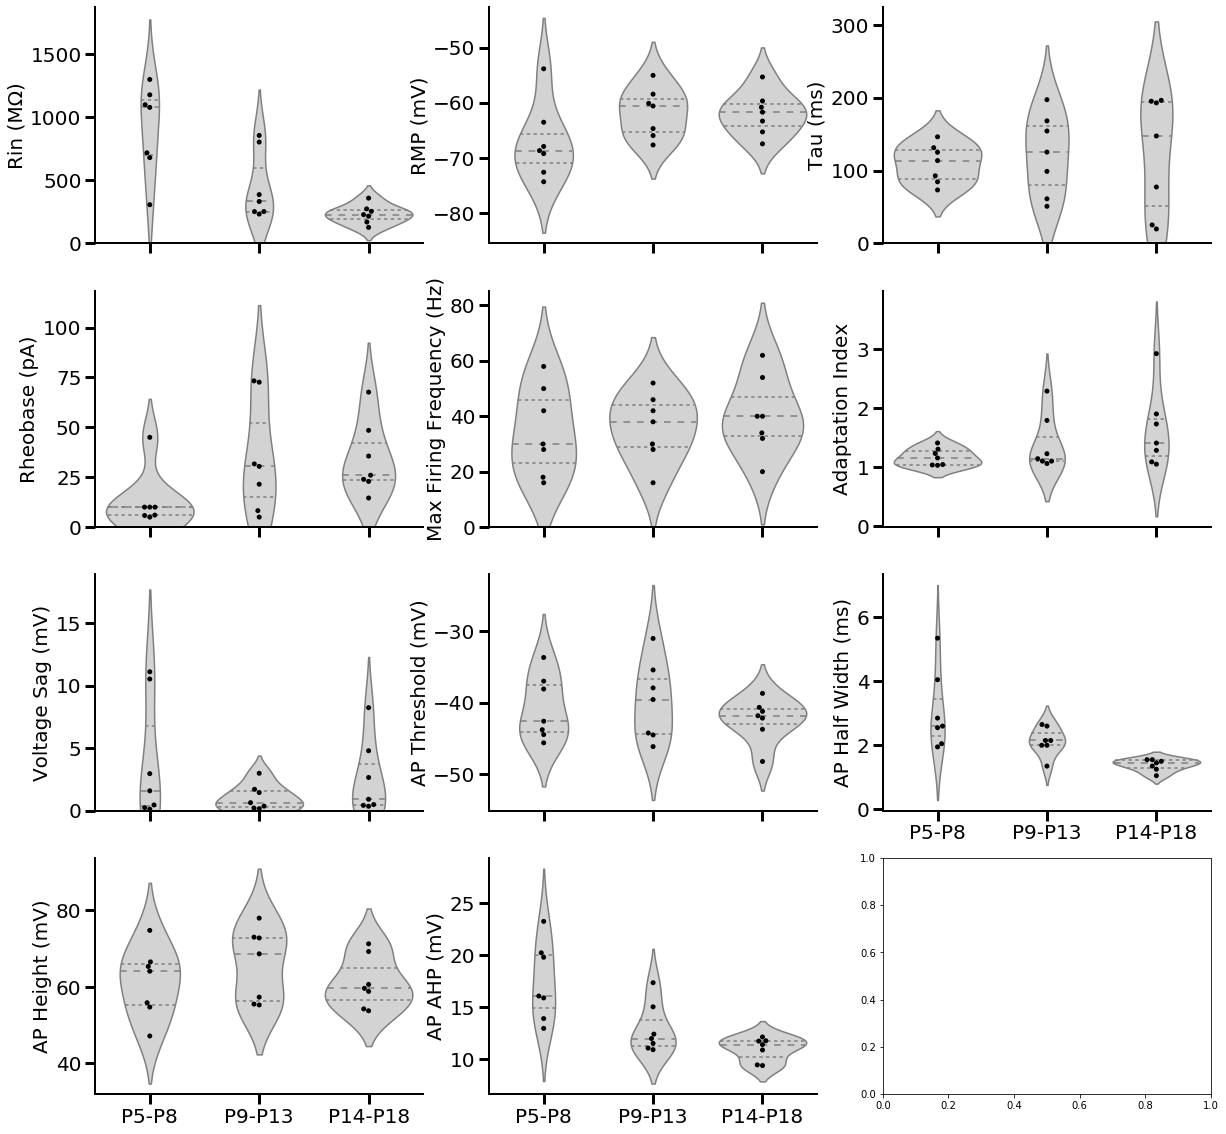

In [30]:
## L4 SST cells in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="SST") & (results.CellLayer==4)]
plotIPfeatures(df)
plt.savefig('Figures//IP_V1_SST_L4.pdf')  

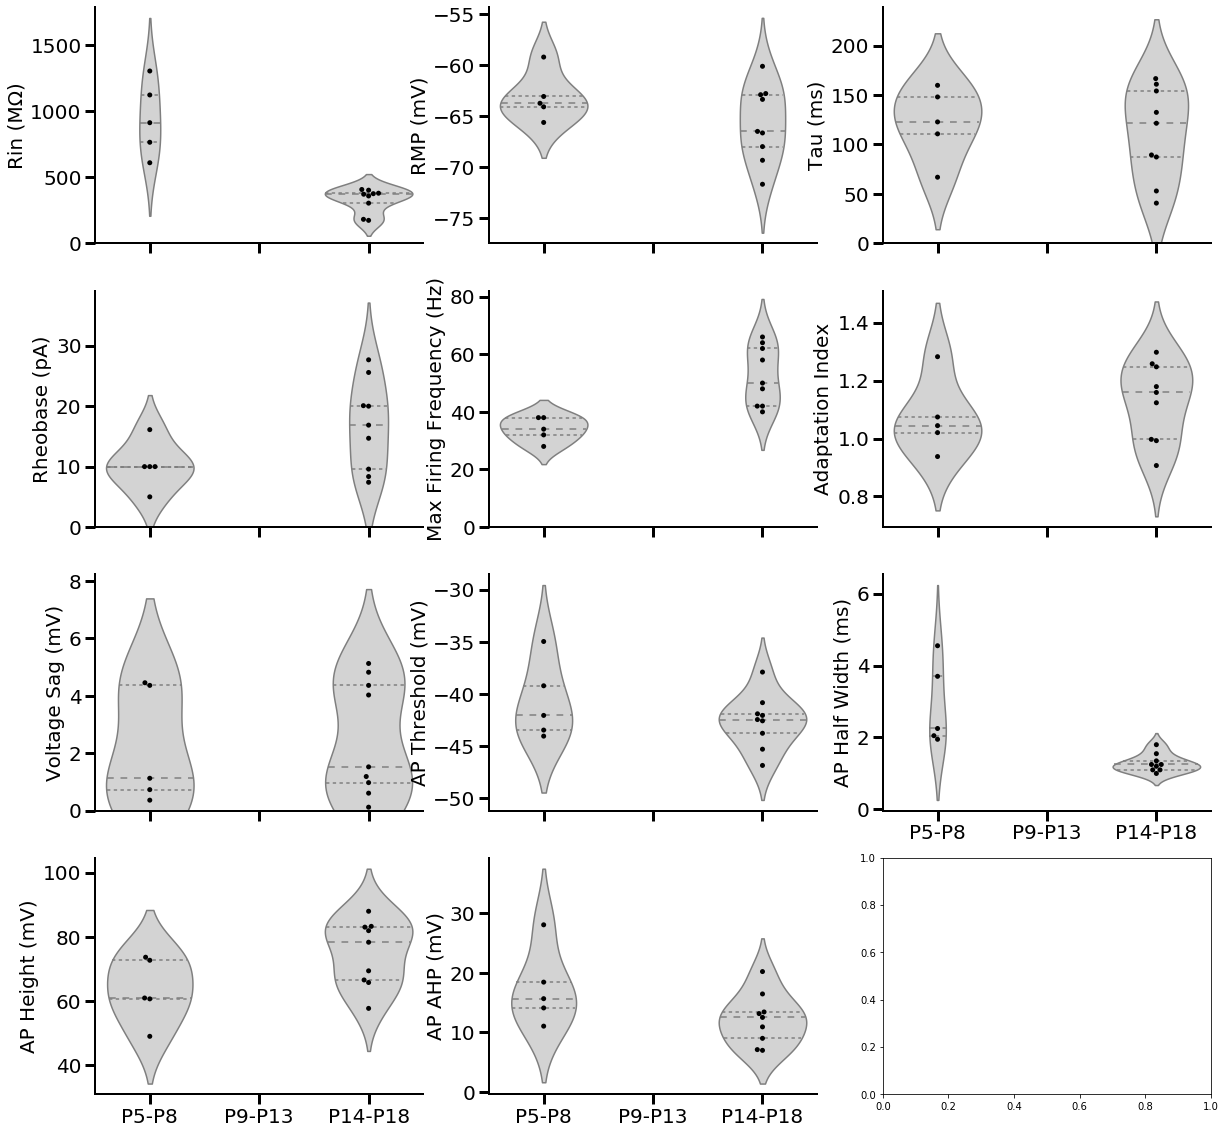

In [49]:
## L5 SST cells in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="SST") & ((results.CellLayer==5) | (results.CellLayer==42))]
plotIPfeatures(df)
plt.savefig('Figures//IP_V1_SST_L5.pdf') 